<a href="https://colab.research.google.com/github/oenereaty/MP2024/blob/main/MP2024_quiz4(1)_%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C%ED%95%99%EA%B3%BC_%EC%B1%84%EA%B2%BD%EC%9B%90(202321639).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [6]:
pip install transformers datasets evaluate accelerate pillow torchvision scikit-learn

In [7]:
import datasets
import transformers
import torchvision.transforms
import evaluate
import numpy as np

In [8]:
beans = datasets.load_dataset('beans')
beans

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

(1) beans['train'][10] 에 포함된 이미지의 크기와 라벨을 확인하라.



In [9]:
beans['train'][10]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.107.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0}

In [10]:
자르고크기조정하기 = torchvision.transforms.RandomResizedCrop((224,224))

In [11]:
img = beans['train'][10]['image']

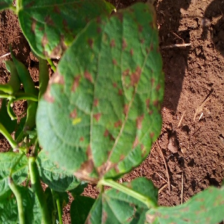

In [12]:
자르고크기조정하기(img)

In [13]:
텐서화하기 = torchvision.transforms.ToTensor()

In [14]:
텐서화하기(img)

tensor([[[0.4706, 0.5255, 0.4549,  ..., 0.4941, 0.4471, 0.3608],
         [0.5529, 0.5529, 0.4549,  ..., 0.6118, 0.5294, 0.4667],
         [0.4157, 0.5451, 0.6157,  ..., 0.6706, 0.5961, 0.5333],
         ...,
         [0.7412, 0.6471, 0.5137,  ..., 0.3686, 0.3216, 0.2824],
         [0.7216, 0.6588, 0.5569,  ..., 0.3961, 0.3412, 0.2941],
         [0.6471, 0.6588, 0.5804,  ..., 0.3804, 0.3490, 0.3098]],

        [[0.2863, 0.3412, 0.2784,  ..., 0.3255, 0.2824, 0.1961],
         [0.3686, 0.3686, 0.2706,  ..., 0.4353, 0.3608, 0.2980],
         [0.2275, 0.3647, 0.4353,  ..., 0.4824, 0.4118, 0.3490],
         ...,
         [0.7647, 0.6902, 0.5882,  ..., 0.2863, 0.2588, 0.2275],
         [0.7333, 0.6980, 0.6314,  ..., 0.3137, 0.2706, 0.2314],
         [0.6549, 0.6863, 0.6549,  ..., 0.2980, 0.2784, 0.2471]],

        [[0.2078, 0.2627, 0.1961,  ..., 0.2588, 0.2275, 0.1412],
         [0.2902, 0.2902, 0.1922,  ..., 0.3608, 0.2941, 0.2353],
         [0.1412, 0.2745, 0.3451,  ..., 0.3961, 0.3333, 0.

In [15]:
표준화하기 = torchvision.transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])

In [16]:
이미지처리하기 = torchvision.transforms.Compose([자르고크기조정하기, 텐서화하기, 표준화하기])

In [22]:
이미지처리하기(img)

tensor([[[-0.2000,  0.0902,  0.1843,  ..., -0.1216,  0.0824,  0.3020],
         [-0.1373,  0.0824,  0.2392,  ..., -0.1216, -0.0118,  0.2157],
         [ 0.1059,  0.0431,  0.2471,  ..., -0.1922,  0.0510,  0.3333],
         ...,
         [ 0.4118,  0.4039,  0.3882,  ..., -0.0588,  0.2157,  0.2549],
         [ 0.4196,  0.4196,  0.4118,  ...,  0.1686,  0.2471,  0.2549],
         [ 0.4196,  0.4353,  0.4353,  ...,  0.4588,  0.3255,  0.0196]],

        [[-0.4588, -0.1686,  0.0510,  ..., -0.3961, -0.2157, -0.0118],
         [-0.4980, -0.2784, -0.0196,  ..., -0.4118, -0.3098, -0.1059],
         [-0.2863, -0.3412, -0.0667,  ..., -0.4824, -0.2471,  0.0118],
         ...,
         [ 0.6784,  0.6784,  0.6627,  ..., -0.4902, -0.2078, -0.1608],
         [ 0.6941,  0.6941,  0.6863,  ..., -0.2549, -0.1686, -0.1451],
         [ 0.6863,  0.7098,  0.7098,  ...,  0.0353, -0.0824, -0.3804]],

        [[-0.7569, -0.4667, -0.3961,  ..., -0.4667, -0.3647, -0.2235],
         [-0.7176, -0.4902, -0.3490,  ..., -0

In [17]:
image_processor = transformers.AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
def transforms(examples):
    _transforms = torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])
    examples["pixel_values"] = [_transforms(img) for img in examples["image"]]
    del examples["image"]
    return examples
beans = beans.with_transform(transforms)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [18]:
labels = beans["train"].features["labels"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [19]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=3,
    id2label=id2label,
    label2id=label2id,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
data_collator = transformers.DefaultDataCollator()
accuracy = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)
training_args = transformers.TrainingArguments(
    output_dir="my_awesome_food_model",
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
    report_to="none"
)

In [21]:
trainer = transformers.Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=beans["train"],
    eval_dataset=beans["validation"],
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

In [23]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
0,1.056800,0.689241,0.872180
1,0.519100,0.371820,0.954887
2,0.385900,0.307389,0.962406


TrainOutput(global_step=48, training_loss=0.6187677135070165, metrics={'train_runtime': 162.9638, 'train_samples_per_second': 19.035, 'train_steps_per_second': 0.295, 'total_flos': 2.3712761350139904e+17, 'train_loss': 0.6187677135070165, 'epoch': 2.953846153846154})

In [30]:
beans_transformed = beans.with_transform(transforms)

# 예측하기

In [28]:
classifier = transformers.pipeline("image-classification", model="my_awesome_food_model/checkpoint-48")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [29]:
classifier(img)

[{'label': 'bean_rust', 'score': 0.679704487323761},
 {'label': 'angular_leaf_spot', 'score': 0.6339754462242126},
 {'label': 'healthy', 'score': 0.25313863158226013}]

In [41]:
trainer.predict(beans_transformed['train'])

PredictionOutput(predictions=array([[ 1.025704  ,  0.3668623 , -0.97352374],
       [ 1.2564719 ,  0.04623776, -1.2054094 ],
       [ 1.2993977 , -0.06771174, -1.0536737 ],
       ...,
       [-1.1806563 , -0.86010295,  1.5090137 ],
       [-1.1696538 , -0.9121308 ,  1.4884229 ],
       [-1.2457342 , -0.8071898 ,  1.4382474 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 2, 2, 2]), metrics={'test_loss': 0.3165731728076935, 'test_accuracy': 0.9545454545454546, 'test_runtime': 20.5204, 'test_samples_per_second': 50.389, 'test_steps_per_second': 3.168})

In [42]:
type(beans_transformed['train'])

datasets.arrow_dataset.Dataset

In [43]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [44]:
type(beans['train'][10])

dict

In [55]:
이미지처리하기(img)

tensor([[[-0.0902, -0.0824, -0.1373,  ...,  0.3490,  0.1765, -0.1294],
         [-0.2392, -0.0745, -0.0510,  ...,  0.2549,  0.1843, -0.0275],
         [-0.2078, -0.2314,  0.0039,  ...,  0.1922,  0.1529,  0.1294],
         ...,
         [-0.7882, -0.7725, -0.7961,  ...,  0.0667,  0.0510,  0.0824],
         [-0.7490, -0.6235, -0.6471,  ..., -0.0039,  0.0039,  0.0353],
         [-0.7961, -0.7098, -0.6078,  ..., -0.0745, -0.0588, -0.0353]],

        [[-0.3098, -0.2784, -0.3098,  ...,  0.0118, -0.1686, -0.4745],
         [-0.5137, -0.3490, -0.3176,  ..., -0.0824, -0.1608, -0.3725],
         [-0.5059, -0.5529, -0.3255,  ..., -0.1373, -0.1843, -0.2000],
         ...,
         [-0.3725, -0.3490, -0.3569,  ...,  0.4196,  0.3961,  0.3804],
         [-0.3333, -0.1922, -0.1843,  ...,  0.4118,  0.4118,  0.3961],
         [-0.3804, -0.2784, -0.1529,  ...,  0.3804,  0.4039,  0.4118]],

        [[-0.4902, -0.5373, -0.6314,  ..., -0.1922, -0.3647, -0.6314],
         [-0.6157, -0.5137, -0.5608,  ..., -0

In [63]:
data_collator(이미지처리하기(img))

{}

In [66]:
으악 = beans_transformed['train'][10]['pixel_values']

In [67]:
model(으악)

ValueError: not enough values to unpack (expected 4, got 3)

In [71]:
trainer.predict(beans['test'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 1.8760319 , -0.41068164, -1.2496443 ],
       [ 1.8768375 , -0.76635796, -0.857106  ],
       [ 1.9198481 , -0.6405256 , -1.071097  ],
       [ 1.9941891 , -0.67667013, -1.0728728 ],
       [ 1.8020024 , -0.59396774, -0.9860665 ],
       [ 1.8664358 , -0.65306693, -0.9365182 ],
       [ 1.5400345 ,  0.12006211, -1.392486  ],
       [ 1.9770246 , -0.6116987 , -1.0248221 ],
       [ 1.9445101 , -0.55770636, -1.0360034 ],
       [ 1.9195127 , -0.9021877 , -0.80493295],
       [ 1.9525621 , -0.7719199 , -0.85497946],
       [ 1.8149748 , -0.83997375, -0.90203094],
       [ 1.6859903 , -0.16226956, -1.3512886 ],
       [ 1.8339036 , -0.35574016, -1.1371678 ],
       [ 1.9746044 , -0.7822137 , -1.0124209 ],
       [ 1.8615478 , -0.6219957 , -0.9376369 ],
       [ 1.8543845 , -0.7078797 , -0.95888126],
       [ 1.6088645 , -0.5836082 , -0.9323118 ],
       [ 2.0011654 , -0.8611447 , -0.77186006],
       [ 1.9708481 , -0.6085163 , -1.1769125 ],
       [ 1.

In [74]:
trainer.predict(beans['validation'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 1.5375315e+00, -9.7038811e-01, -4.3356791e-01],
       [ 1.9573224e+00, -6.1474681e-01, -1.1199616e+00],
       [ 1.6675673e+00, -3.3315530e-01, -1.2280464e+00],
       [ 1.7297657e+00, -6.6215718e-01, -9.5322722e-01],
       [ 1.8235358e+00, -4.4375530e-01, -1.1883149e+00],
       [ 1.8117914e+00, -7.4375576e-01, -9.1908127e-01],
       [ 1.5459042e+00,  1.5167684e-04, -1.4747425e+00],
       [ 1.8506449e+00, -5.9740335e-01, -1.0526283e+00],
       [ 1.9216129e+00, -5.1549393e-01, -1.0881524e+00],
       [ 3.6919184e-02, -1.1626189e+00,  7.9290509e-01],
       [ 3.2267588e-01,  7.5485384e-01, -8.7296981e-01],
       [ 1.7669513e+00, -8.7237185e-01, -7.6249272e-01],
       [ 1.7530341e+00, -5.3297925e-01, -1.0570909e+00],
       [ 9.7144377e-01,  3.8838798e-01, -1.2091483e+00],
       [ 1.8884512e+00, -6.9608825e-01, -9.2444181e-01],
       [ 1.7942605e+00, -7.8489566e-01, -7.9222500e-01],
       [ 1.9375218e+00, -6.4082330e-01, -1.0423021e+00],
  

In [75]:
trainer.predict(beans['train'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 1.5581366 ,  0.02614913, -1.4224638 ],
       [ 1.8072882 , -0.29889366, -1.2408351 ],
       [ 1.3936051 ,  0.27597386, -1.4231894 ],
       ...,
       [-1.1177254 , -1.1717849 ,  1.7943952 ],
       [-1.0993326 , -1.2252554 ,  1.8512884 ],
       [-1.2534726 , -1.1437368 ,  1.8002505 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 2, 2, 2]), metrics={'test_loss': 0.20979832112789154, 'test_accuracy': 0.9593810444874274, 'test_runtime': 27.3799, 'test_samples_per_second': 37.765, 'test_steps_per_second': 2.374})

In [73]:
trainer.predict(beans_transformed['test'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 1.6221086 , -0.17860422, -1.243974  ],
       [ 1.9087827 , -0.694586  , -0.95524263],
       [ 1.9117025 , -0.6577291 , -1.0279742 ],
       [ 1.9867253 , -0.78470784, -0.98818153],
       [ 1.8579216 , -0.5152057 , -1.1862099 ],
       [ 1.892953  , -0.47644565, -1.1601417 ],
       [ 1.8584311 , -0.35298812, -1.2199724 ],
       [ 1.9750102 , -0.6704113 , -1.0002463 ],
       [ 1.9388096 , -0.7273329 , -0.9613616 ],
       [ 2.0007632 , -0.6763515 , -1.0696399 ],
       [ 1.9403844 , -0.74476767, -0.93954396],
       [ 1.7085892 , -0.8818456 , -0.68582296],
       [ 1.8324535 , -0.3604847 , -1.1791259 ],
       [ 1.7687527 , -0.31821343, -1.1240261 ],
       [ 1.8646482 , -0.39855227, -1.2083791 ],
       [ 1.9847798 , -0.84605175, -0.9092881 ],
       [ 1.8566734 , -0.68256027, -0.9287507 ],
       [ 1.5630708 , -0.4153743 , -1.0561248 ],
       [ 1.9093782 , -0.84169006, -0.7239886 ],
       [ 1.9842734 , -0.6983016 , -1.0828646 ],
       [ 1.

In [76]:
trainer.predict(beans_transformed['validation'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 0.8000405 , -0.92818934,  0.12784581],
       [ 1.9372741 , -0.60281605, -1.1085403 ],
       [ 0.8780525 ,  0.6257383 , -1.2412354 ],
       [ 1.5211828 , -0.5383561 , -0.8619014 ],
       [ 1.6849012 , -0.11260232, -1.3651241 ],
       [ 1.7937692 , -0.7900353 , -0.8409129 ],
       [ 1.8032097 , -0.5773151 , -1.1264687 ],
       [ 1.9347205 , -0.49882457, -1.1915483 ],
       [ 1.7637843 , -0.3833258 , -1.1165355 ],
       [ 1.1474229 , -0.47546008, -0.724119  ],
       [ 0.7895981 ,  0.47447443, -1.0427448 ],
       [ 1.9331582 , -0.68168336, -1.0795399 ],
       [ 1.8854135 , -0.6797295 , -0.9138533 ],
       [ 1.3484445 ,  0.02939295, -1.1245676 ],
       [ 1.5844223 , -0.5211496 , -0.99905664],
       [ 1.8982148 , -0.743205  , -0.8692014 ],
       [ 1.7821523 , -0.55442435, -1.1076715 ],
       [ 1.7871689 , -0.6340307 , -0.8777991 ],
       [ 1.9762684 , -0.8046707 , -0.86160135],
       [ 1.37077   , -0.87287116, -0.5581405 ],
       [ 1.

In [77]:
trainer.predict(beans_transformed['train'])

Epoch,Training Loss,Validation Loss


PredictionOutput(predictions=array([[ 1.7644843 , -0.19525261, -1.2971038 ],
       [ 0.9244202 ,  0.7174584 , -1.2946124 ],
       [ 1.8386614 , -0.50805205, -1.0686916 ],
       ...,
       [-1.1940371 , -1.1341105 ,  1.8119662 ],
       [-1.1127908 , -1.2361574 ,  1.8518451 ],
       [-1.291438  , -1.0782846 ,  1.7906755 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 2, 2, 2]), metrics={'test_loss': 0.20515252649784088, 'test_accuracy': 0.9642166344294004, 'test_runtime': 24.834, 'test_samples_per_second': 41.637, 'test_steps_per_second': 2.617})

In [78]:
type((beans_transformed['test']))

datasets.arrow_dataset.Dataset

In [79]:
이미지 = beans['train'][10]

In [90]:
우악 = data_collator([beans_transformed['train'][0]])['pixel_values']

In [89]:
model(data_collator([beans_transformed['train'][0]])['pixel_values'])

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [93]:
trainer.predict(우악)

TypeError: can only join an iterable